<h1 align='center'>Gold Price Prediction using Random Forest</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../Datasets/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.shape

(2290, 6)

In [4]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df=df.drop(columns='Date',axis=1)

In [6]:
correlation=df.corr()

<Axes: >

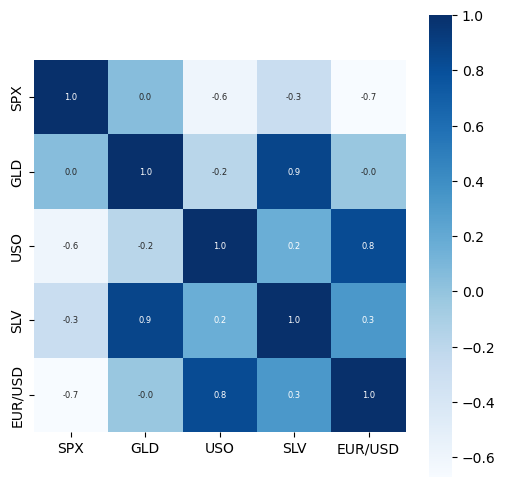

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':6},cmap='Blues')

In [8]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Density'>

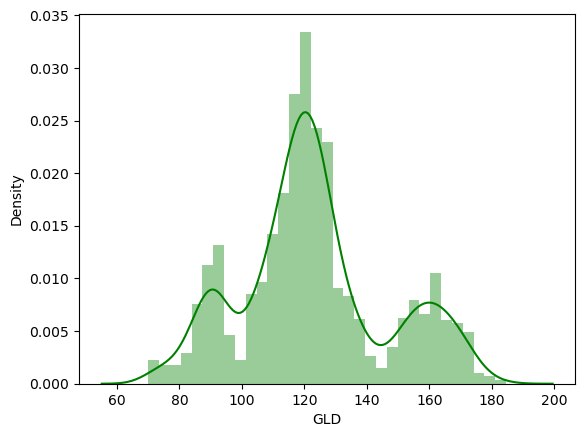

In [9]:
sns.distplot(df.GLD,color='green')

In [10]:
X=df.drop(columns=['GLD'],axis=1)
Y=df.GLD

In [11]:
X.shape,Y.shape

((2290, 4), (2290,))

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

In [13]:
X_train.shape,X_test.shape

((1832, 4), (458, 4))

In [14]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [15]:
predicted_y_train=model.predict(X_train)
metrics.r2_score(predicted_y_train,Y_train)

0.9984978545063399

In [16]:
predicted_y_test=model.predict(X_test)
metrics.r2_score(predicted_y_test,Y_test)

0.9888873383214319

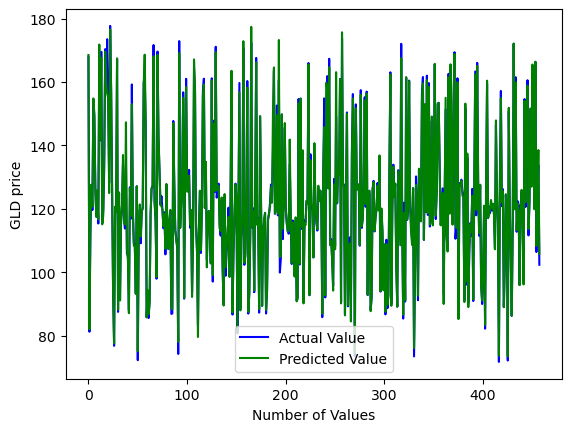

In [17]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(predicted_y_test,color='green',label='Predicted Value')
plt.legend()
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.show()